# CPSC 4970 AI + ML: Module 6 -- clustering

[Clustering documentation](https://scikit-learn.org/stable/modules/clustering.html)
[KMeans documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

In [1]:
import sklearn.datasets
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import pair_confusion_matrix
plt.style.use('dark_background')

In [2]:
d = sklearn.datasets.load_iris(as_frame=True)['frame']
targets = d['target']
del d['target']
display(d.head())
display(d.info())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


None

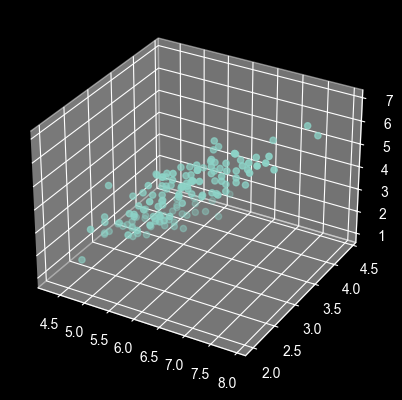

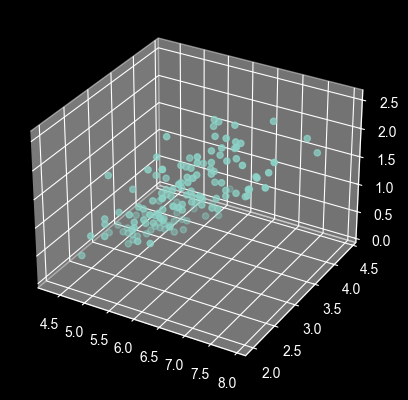

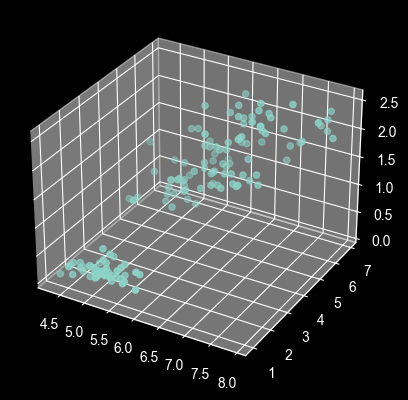

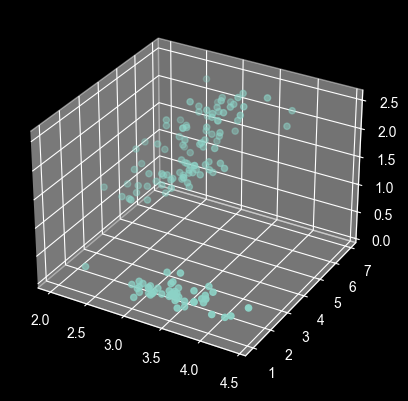

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(d['sepal length (cm)'], d['sepal width (cm)'], d['petal length (cm)'])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(d['sepal length (cm)'], d['sepal width (cm)'], d['petal width (cm)'])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(d['sepal length (cm)'], d['petal length (cm)'], d['petal width (cm)'])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(d['sepal width (cm)'], d['petal length (cm)'], d['petal width (cm)'])

In [4]:
clusters = KMeans(n_clusters=5).fit(d)
display(clusters.labels_)
display(clusters.predict(d))  # note: same!

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 4, 1, 1, 4, 0, 4, 1, 4,
       1, 1, 1, 3, 1, 1, 1, 4, 4, 3, 1, 3, 4, 3, 1, 4, 3, 3, 1, 4, 4, 4,
       1, 3, 3, 4, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3], dtype=int32)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 4, 1, 1, 4, 0, 4, 1, 4,
       1, 1, 1, 3, 1, 1, 1, 4, 4, 3, 1, 3, 4, 3, 1, 4, 3, 3, 1, 4, 4, 4,
       1, 3, 3, 4, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3], dtype=int32)

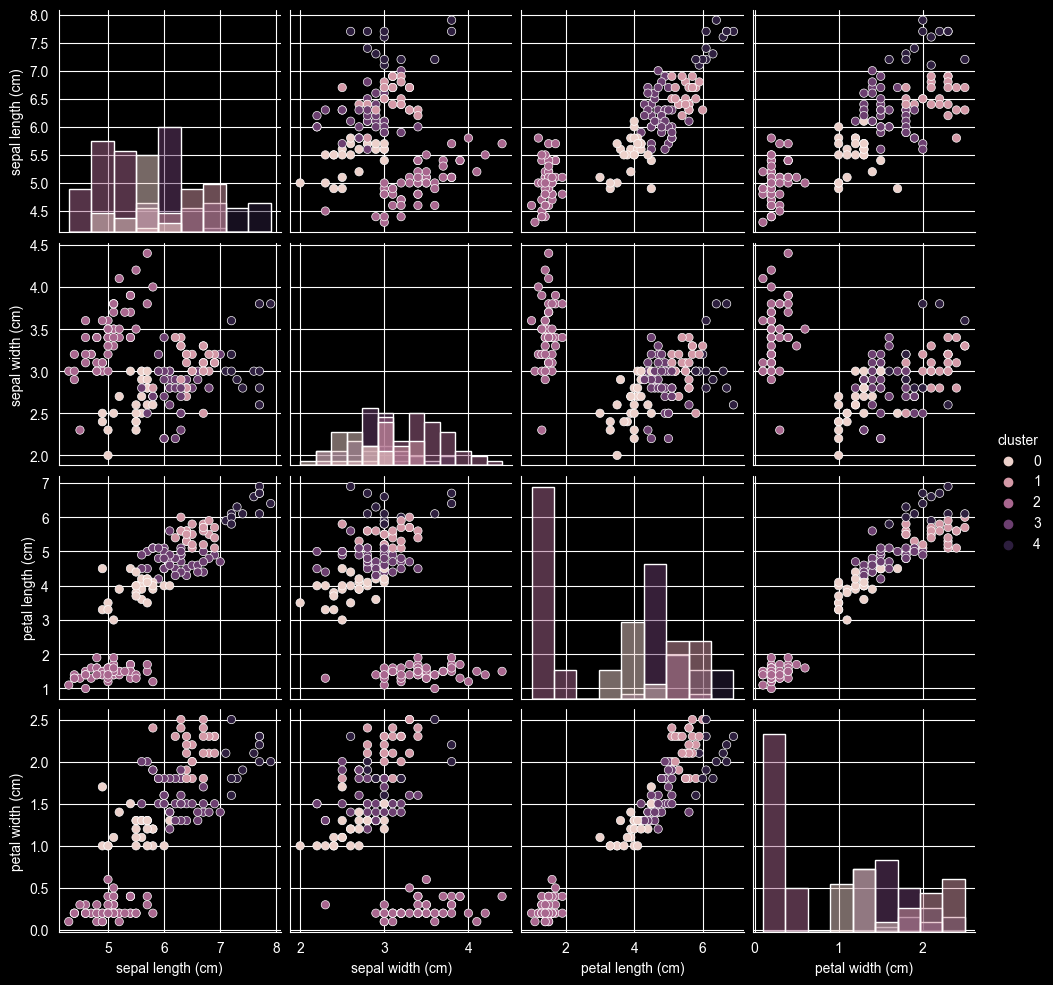

In [5]:
d['cluster'] = clusters.predict(d)
sns.pairplot(d, diag_kind='hist', hue='cluster')

Metrics

[User guide section on unsupervised learning metrics](https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation)

In [6]:
del d['cluster']
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


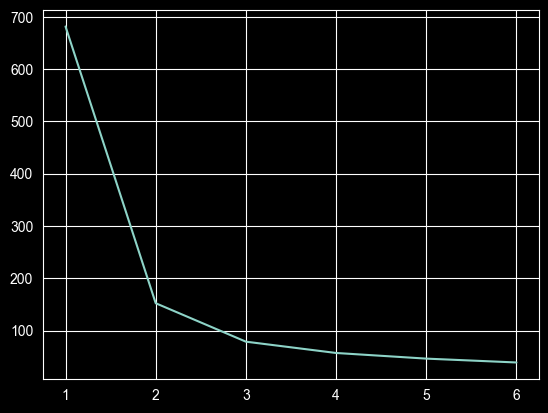

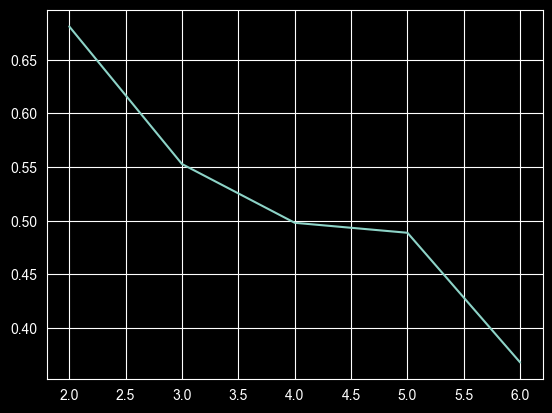

In [7]:
wss_values = []
sil_values = []
for k in range(1, 7):
    clusters = KMeans(n_clusters=k).fit(d)
    wss_values.append(clusters.inertia_)
    if k > 1: sil_values.append(silhouette_score(d, clusters.labels_))
plt.plot(range(1, 7), wss_values)
plt.figure()
plt.plot(range(2, 7), sil_values)

In [8]:
clusters = KMeans(n_clusters=3).fit(d)
conf = pair_confusion_matrix(targets, clusters.labels_)
display(conf)
display("Pairwise accuracy: ", (conf[0][0]+conf[1][1]) / (conf[0][0]+conf[0][1] + conf[1][0] + conf[1][1]))

array([[13512,  1488],
       [ 1200,  6150]])

'Pairwise accuracy: '

0.8797315436241611